In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 1. Business Problem

Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting

# 2. Data collection and description

In [2]:
data=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
data.shape

(42, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
data.dtypes

Quarter     object
Sales      float64
dtype: object

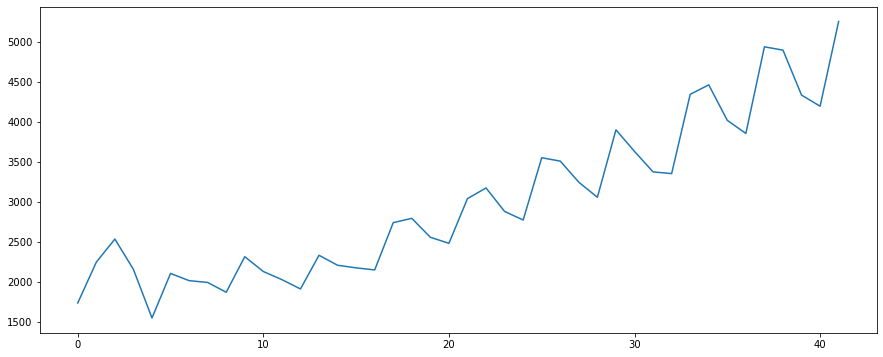

In [7]:
data['Sales'].plot(figsize=(15, 6))
plt.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

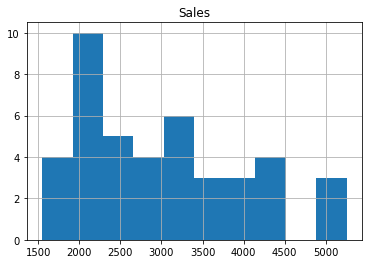

In [8]:
data.hist()

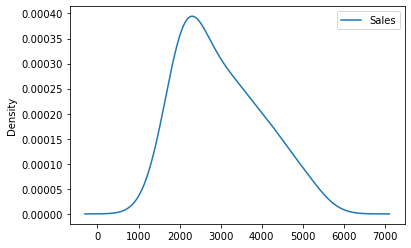

In [9]:
data.plot(kind="kde")
plt.show()

In [10]:
data1 = data.copy()

### Making seasonal_decompose graph from statsmodels.tsa.seasonal library And Analysis the Trend, Seasonal And Residuals in dataset

In [11]:
temp = data1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [12]:
data1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [13]:
data1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [14]:
data1 = data1.drop(['Quarter'], axis=1)


In [15]:
data1.head()

,Sales,quater
0,1734.827000,Jan-1986
1,2244.960999,Apr-1986
2,2533.804993,Jul-1986
3,2154.962997,Oct-1986
4,1547.818996,Jan-1987


In [16]:
data1.reset_index(inplace=True)

In [17]:
data1['quater'] = pd.to_datetime(data1['quater'])

In [18]:
data1 = data1.set_index('quater')

In [19]:
data1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


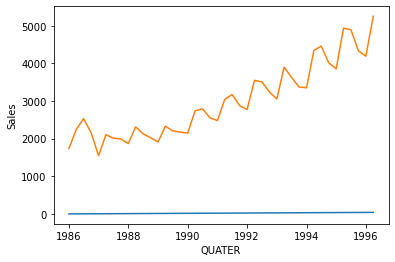

In [20]:
plt.xlabel("QUATER")
plt.ylabel("Sales")
plt.plot(data1)

In [21]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

          Sales
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11  2055.393998
12  2070.042081
13  2077.225747
14  2049.954497
         Sales
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11  261.256519
12  246.139429
13  252.874401
14  213.783151


# 3. Augmented Dickey-fuller test

In [22]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Sales'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           1.309421
p-value                  0.996661
Lags Used                7.000000
No. of Obs              34.000000
Critical Value (1%)     -3.639224
Critical Value (5%)     -2.951230
Critical Value (10%)    -2.614447
dtype: float64


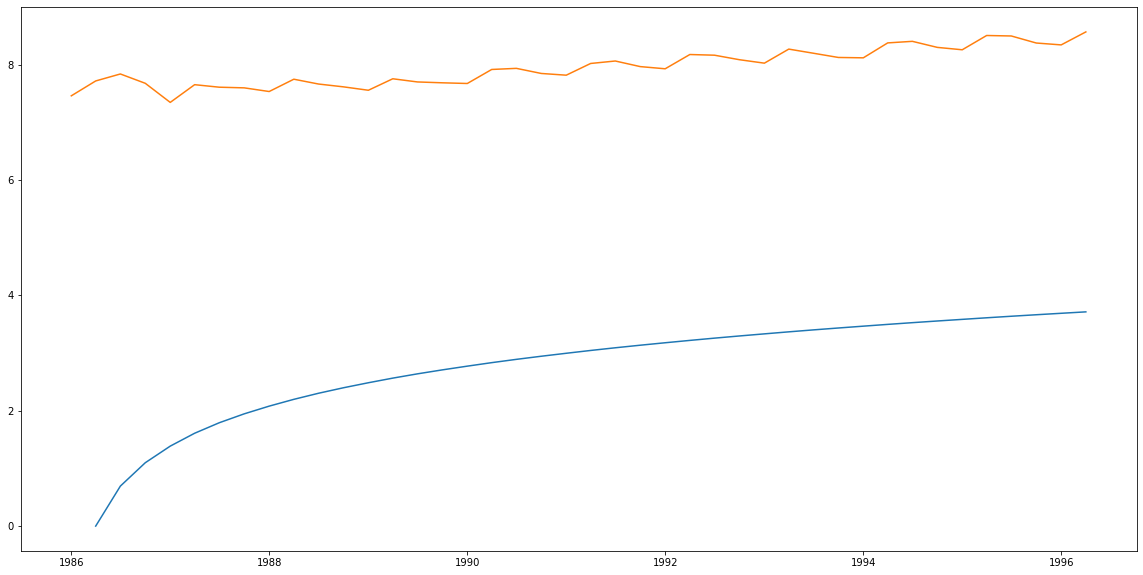

In [23]:
plt.figure(figsize=(20,10))
data_log=np.log(data1)
plt.plot(data_log)

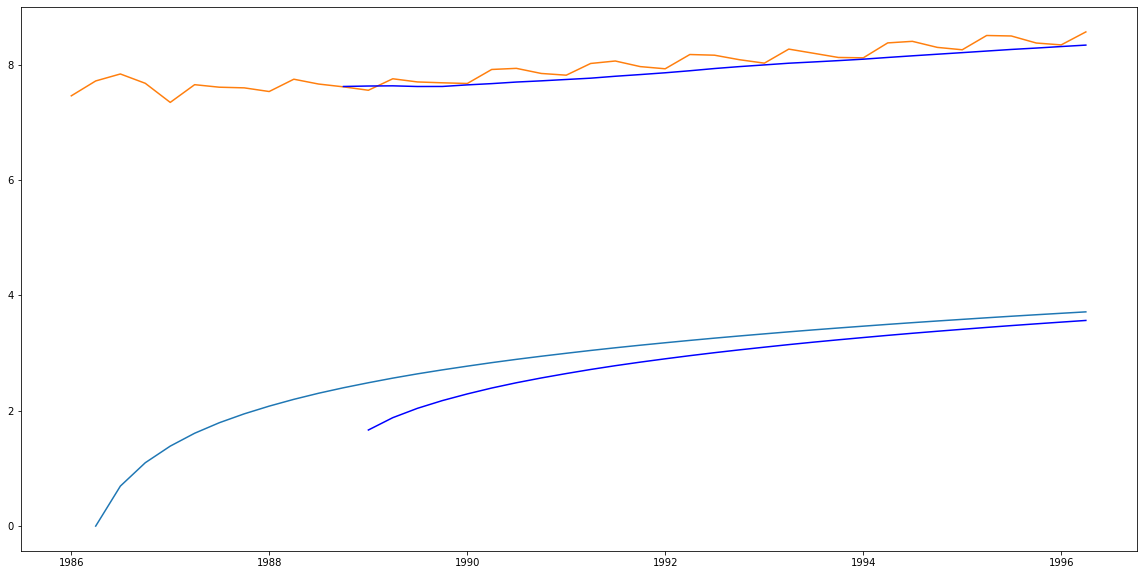

In [24]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

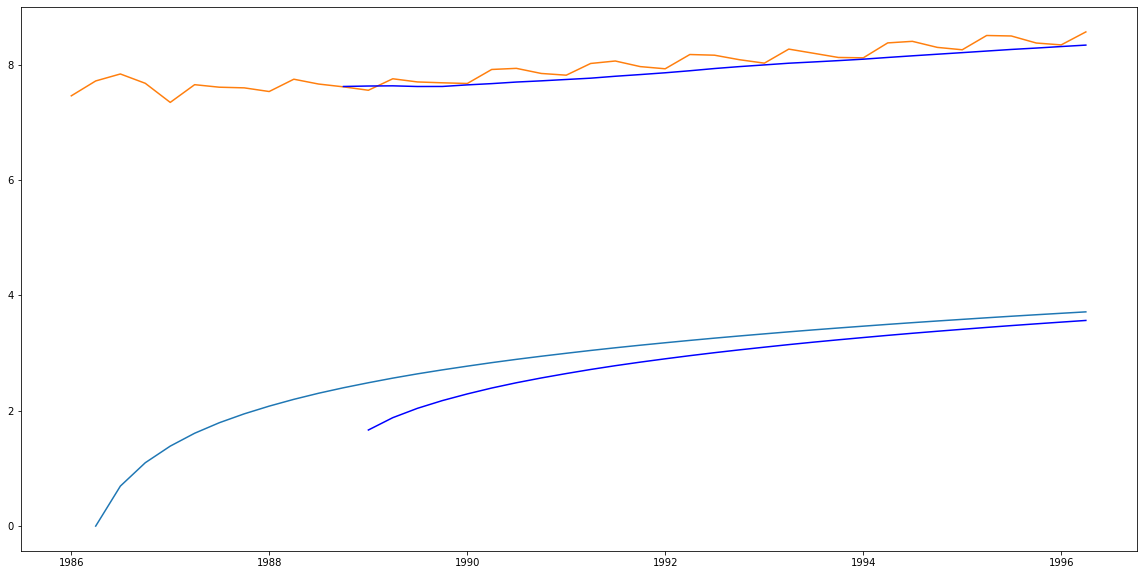

In [25]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [26]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,index,Sales
quater,,
1986-01-01,NaN,NaN
1986-04-01,NaN,NaN
1986-07-01,NaN,NaN
1986-10-01,NaN,NaN
1987-01-01,NaN,NaN
1987-04-01,NaN,NaN
1987-07-01,NaN,NaN
1987-10-01,NaN,NaN
1988-01-01,NaN,NaN


In [27]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,index,Sales
quater,,
1989-01-01,0.819305,-0.073402
1989-04-01,0.685602,0.122407
1989-07-01,0.597551,0.078993
1989-10-01,0.532424,0.063385
1990-01-01,0.481438,0.024180


In [28]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

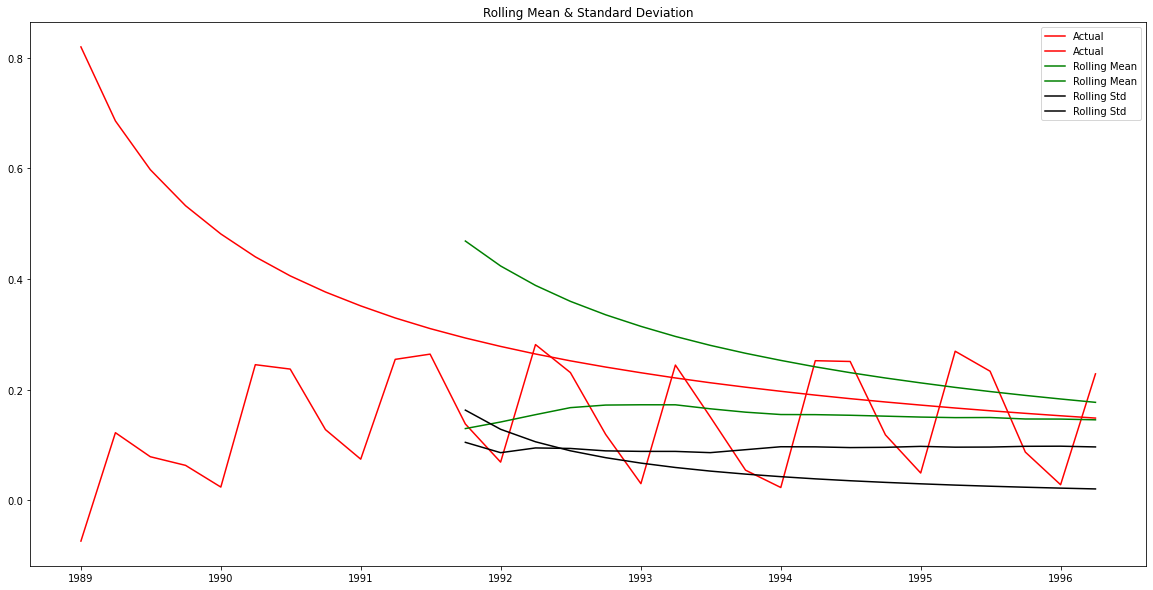

Dickey-Fuller Test: 
Test Statistic          -3.111854
p-value                  0.025688
Lags Used                5.000000
No. of Obs              24.000000
Critical Value (1%)     -3.737709
Critical Value (5%)     -2.992216
Critical Value (10%)    -2.635747
dtype: float64


In [29]:
stationarity(data_log_diff)

# 4. Rolling Statistics Test

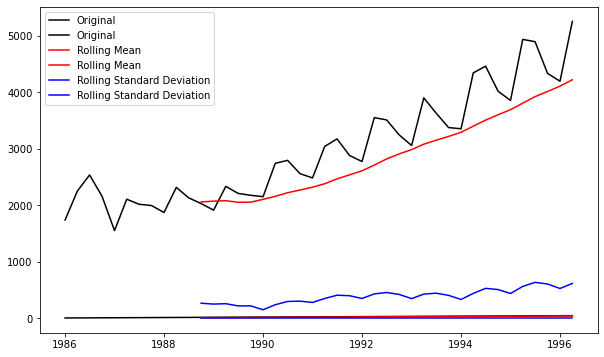

In [30]:
rmean=data1.rolling(window=12).mean()
rstd=data1.rolling(window=12).std()
# print(rmean,rstd)
plt.figure(figsize = (10,6))
orig=plt.plot(data1 , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')

### Now applying Log Transformtion for making Stationry dataset

In [31]:
dff = np.log(data1['Sales'])
dff

quater
1986-01-01    7.458663
1986-04-01    7.716443
1986-07-01    7.837477
1986-10-01    7.675529
1987-01-01    7.344602
1987-04-01    7.651791
1987-07-01    7.608058
1987-10-01    7.596767
1988-01-01    7.533186
1988-04-01    7.746574
1988-07-01    7.663088
1988-10-01    7.614228
1989-01-01    7.555175
1989-04-01    7.754123
1989-07-01    7.699185
1989-10-01    7.684309
1990-01-01    7.672422
1990-04-01    7.915461
1990-07-01    7.934783
1990-10-01    7.846203
1991-01-01    7.816407
1991-04-01    8.019456
1991-07-01    8.062154
1991-10-01    7.965199
1992-01-01    7.927324
1992-04-01    8.174703
1992-07-01    8.162801
1992-10-01    8.084519
1993-01-01    8.024862
1993-04-01    8.268475
1993-07-01    8.196712
1993-10-01    8.123558
1994-01-01    8.117312
1994-04-01    8.376090
1994-07-01    8.403128
1994-10-01    8.298291
1995-01-01    8.256867
1995-04-01    8.504311
1995-07-01    8.495970
1995-10-01    8.374015
1996-01-01    8.341410
1996-04-01    8.566555
Name: Sales, dtype: float64

In [32]:
data1['N_sales'] = dff
data1

,index,Sales,N_sales
quater,,,
1986-01-01,0,1734.827000,7.458663
1986-04-01,1,2244.960999,7.716443
1986-07-01,2,2533.804993,7.837477
1986-10-01,3,2154.962997,7.675529
1987-01-01,4,1547.818996,7.344602
1987-04-01,5,2104.411995,7.651791
1987-07-01,6,2014.362999,7.608058
1987-10-01,7,1991.746998,7.596767
1988-01-01,8,1869.049999,7.533186


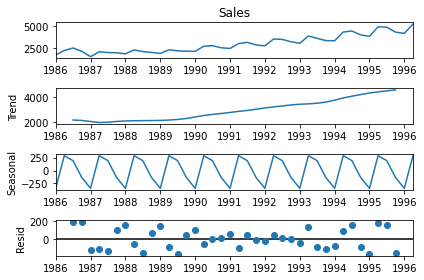

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose   
ts_add = seasonal_decompose(data1['Sales'],model="additive")
fig = ts_add.plot()
plt.show()

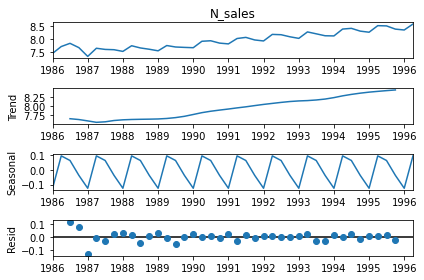

In [34]:
ts_add = seasonal_decompose(data1['N_sales'],model="additive")
fig = ts_add.plot()
plt.show()

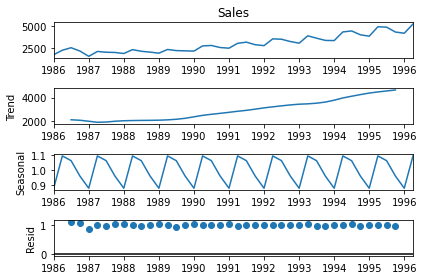

In [35]:
ts_add = seasonal_decompose(data1['Sales'],model="multiadditive")
fig = ts_add.plot()
plt.show()

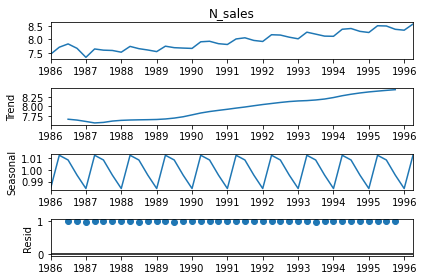

In [36]:
ts_add = seasonal_decompose(data1['N_sales'],model="multiadditive")
fig = ts_add.plot()
plt.show()

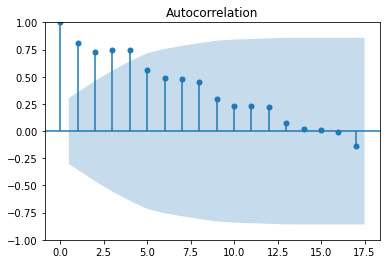

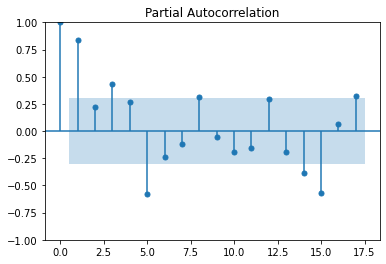

In [37]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data1['Sales'])
tsa_plots.plot_pacf(data1['Sales'])
plt.show()

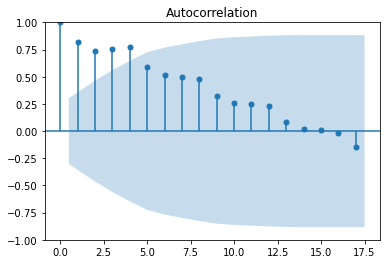

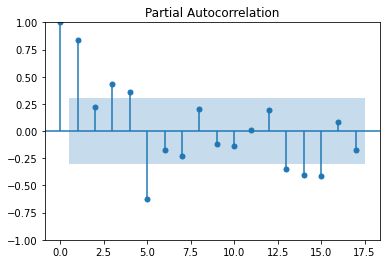

In [38]:
tsa_plots.plot_acf(data1['N_sales'])
tsa_plots.plot_pacf(data1['N_sales'])
plt.show()

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
from pylab import rcParams
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [40]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

# 5. Building Time series forecasting with ARIMA

In [41]:
X = data1['N_sales'].values

In [42]:
X

array([7.45866298, 7.71644343, 7.8374774 , 7.67552883, 7.34460212,
       7.65179137, 7.60805829, 7.59676742, 7.53318556, 7.74657386,
       7.66308821, 7.61422778, 7.5551747 , 7.75412342, 7.69918549,
       7.68430935, 7.67242187, 7.91546061, 7.93478348, 7.84620273,
       7.8164065 , 8.01945587, 8.06215415, 7.96519864, 7.92732436,
       8.17470288, 8.16280135, 8.08451926, 8.02486215, 8.26847539,
       8.19671241, 8.12355784, 8.11731246, 8.37609035, 8.40312824,
       8.29829063, 8.25686685, 8.50431057, 8.49596955, 8.37401542,
       8.34141021, 8.56655462])

In [43]:
size = int(len(X) * 0.66)

In [44]:
train, test = X[0:size], X[size:len(X)]

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
# (from statsmodels.tsa.arima_model import ARIMA ) this is older library formate

model= ARIMA(train, order=(5,1,0))

In [47]:
model_fit = model.fit()

In [48]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  27.706
Date:                Sun, 18 Sep 2022   AIC                            -43.411
Time:                        15:56:14   BIC                            -35.862
Sample:                             0   HQIC                           -41.237
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1671      0.298     -0.561      0.575      -0.751       0.416
ar.L2         -0.2431      0.174     -1.400      0.162      -0.583       0.097
ar.L3         -0.1120      0.174     -0.644      0.5

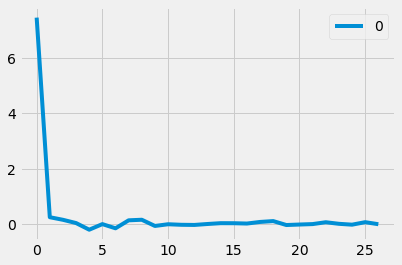

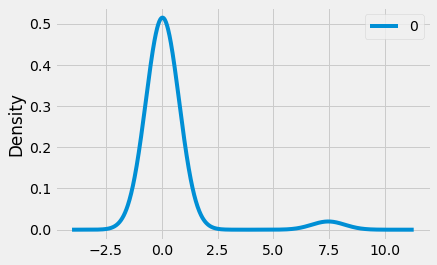

In [49]:
# Calculate residuals and plot it

residual = pd.DataFrame(model_fit.resid)
residual.plot()
pyplot.show()
residual.plot(kind='kde')
pyplot.show()

In [50]:
residual.describe()

,0
count,27.000000
mean,0.307414
std,1.432122
min,-0.192732
25%,-0.008888
50%,0.019646
75%,0.082737
max,7.458663


#### The plot of the residual errors suggests that there may still be some trend information not captured by the model
#### The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals

## 5.1  Rolling Forecast ARIMA Model

In [51]:
history = [x for x in train]

In [52]:
predictions = list()

In [53]:
for t in range(len(test)):
    model1 = ARIMA(history, order=(5,1,0))
    model1_fit = model1.fit()
    output = model1_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predictions=%f, expected=%f' % (yhat, obs))

predictions=8.036774, expected=8.084519
predictions=8.059901, expected=8.024862
predictions=8.232278, expected=8.268475
predictions=8.215367, expected=8.196712
predictions=8.106373, expected=8.123558
predictions=8.091394, expected=8.117312
predictions=8.323971, expected=8.376090
predictions=8.261838, expected=8.403128
predictions=8.301054, expected=8.298291
predictions=8.287090, expected=8.256867
predictions=8.474421, expected=8.504311
predictions=8.490374, expected=8.495970
predictions=8.372245, expected=8.374015
predictions=8.345867, expected=8.341410
predictions=8.561872, expected=8.566555


In [54]:
Errors = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % Errors)

Test MSE: 0.002


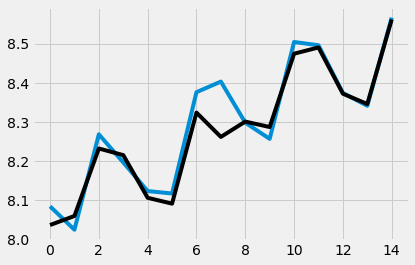

In [55]:
plt.plot(test)
plt.plot(predictions, color='black')
plt.show()

##### A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.

### 5.2 Comparing Multiple models

In [56]:
df2 = pd.get_dummies(data, columns = ['Quarter'])

In [57]:
df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']


In [58]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
t = np.arange(1,43)

In [60]:
df2['t'] = t

In [61]:
df2['t_sq'] = df2['t'] * df2['t']  # doing square

In [62]:
log_Sales = np.log(df2['Sales'])  # doing Log

In [63]:
df2['log_Sales'] = log_Sales

In [64]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [65]:
train1, test1 = np.split(df2, [int(len(data1)*0.67)])

### Making Different seasonality Model

In [66]:
# Making Linear Model
lin = smf.ols('Sales~t',data=train1).fit()
pred_lin = pd.Series(lin.predict(pd.DataFrame(test1['t'])))
rmse_lin = np.sqrt((np.mean(np.array(test1['Sales'])-np.array(pred_lin))**2))
rmse_lin

580.1224130918638

In [67]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmse_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_quad))**2))
rmse_quad

783.7297975037454

In [68]:
expo=smf.ols('log_Sales~t',data=train1).fit()
pred_exp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmse_expo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_expo

588.1405104900188

In [69]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
pred_add=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmse_add=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_add))**2))
rmse_add

1869.7188209186943

In [70]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
pred_add_linear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmse_add_linear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_add_linear))**2))
rmse_add_linear

596.1526282372467

In [71]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_add_quad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmse_add_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_add_quad))**2))
rmse_add_quad

412.1144436053153

In [72]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmse_mul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul)))**2))
rmse_mul

2374.9194407954365

In [73]:
mul_lin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_lin= pd.Series(mul_lin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmse_mul_lin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_lin)))**2))
rmse_mul_lin

5359.687911932153

In [74]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.56194673444

### Conclusion of Different  Seasonality models

In [75]:
output = {'Model':pd.Series(['rmse_mul_quad',
                             'rmse_add',
                             'rmse_add_linear',
                             'rmse_add_quad',
                             'rmse_expo',
                             'rmse_lin',
                             'rmse_mul',
                             'rmse_mul_lin',
                             'rmse_quad']),
          'Values':pd.Series([rmse_mul_quad,
                             rmse_add,
                             rmse_add_linear,
                             rmse_add_quad,
                             rmse_expo,
                             rmse_lin,
                             rmse_mul,
                             rmse_mul_lin,
                             rmse_quad])}

In [76]:
rmse=pd.DataFrame(output)

In [77]:
rmse

,Model,Values
0,rmse_mul_quad,3630.561947
1,rmse_add,1869.718821
2,rmse_add_linear,596.152628
3,rmse_add_quad,412.114444
4,rmse_expo,588.140510
5,rmse_lin,580.122413
6,rmse_mul,2374.919441
7,rmse_mul_lin,5359.687912
8,rmse_quad,783.729798


#### Additive seasonality with quadratic trend has the best RMSE value

# 6. Smoothing Techniques

In [78]:
Train = data.head(31)
Test = data.tail(10)

### Evaluation Metric MAPE

In [79]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [80]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

23.033304211167383

### Holt's Method

In [81]:
holt_model = Holt(Train["Sales"]).fit(smoothing_level=0.75, smoothing_slope=0.25)
pred_holt = holt_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_holt,Test.Sales)

9.373149837427276

### Holts Winter Exponential Smoothing with Additive Seasonality and Additive Arend

In [82]:
'''Here select Seasonal and Trend = Additive and make model'''

hwe_model_add_add = ExponentialSmoothing(Train["Sales"],
                                         seasonal="add",
                                         trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

9.555384838393277

In [83]:
print(hwe_model_add_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   31
Model:             ExponentialSmoothing   SSE                         859257.361
Optimized:                         True   AIC                            349.125
Trend:                         Additive   BIC                            372.069
Seasonal:                      Additive   AICC                           406.125
Seasonal Periods:                    12   Date:                 Sun, 18 Sep 2022
Box-Cox:                          False   Time:                         15:57:18
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7437746                alpha                 True
smoothing_trend          

### Holts Winter Exponential Smoothing with multiplicative Seasonality and Additive Arend

In [84]:
'''Here select Seasonal = multiplicative and Trend = Additive and make model'''

hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],
                                         seasonal="mul",
                                         trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

11.39711289892988

### Holts Winter Exponential Smoothing with Additive Seasonality and multiplicative Arend

In [85]:
'''Here select Seasonal = Additive and Trend = multiplicative and make model'''

hwe_model_add_mul = ExponentialSmoothing(Train["Sales"],
                                         seasonal="add",
                                         trend="mul",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_add_mul = hwe_model_add_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_mul,Test.Sales)

6.0547392179203605

### Holts Winter Exponential Smoothing with multiplicative Seasonality and multiplicative Arend

In [86]:
'''Here select Seasonal = multiplicative and Trend = multiplicative and make model'''

hwe_model_mul_mul = ExponentialSmoothing(Train["Sales"],
                                         seasonal="mul",
                                         trend="mul",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_mul,Test.Sales)

3.2609150502368296

# 7.  Final Model by Combining Train and Test

In [87]:
final_model1 = ExponentialSmoothing(data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [88]:
#Forecasting for next 10 time periods

Value1 = final_model1.forecast(20)
Value1

42    5011.143094
43    4651.332997
44    4509.126228
45    5668.407310
46    5708.230529
47    5153.555030
48    4896.618836
49    6200.007002
50    6177.156448
51    5542.575684
52    5113.047662
53    6444.370246
54    6121.941890
55    5663.674104
56    5473.034182
57    6858.924831
58    6886.489823
59    6199.332870
60    5873.734939
61    7416.976005
dtype: float64

In [89]:
final_model2 = ExponentialSmoothing(data["Sales"],
                                    seasonal="add",
                                    trend="mul",
                                    seasonal_periods=12).fit()

In [90]:
Value2 = final_model2.forecast(20)
Value2

42    5112.438844
43    5012.268437
44    5009.061240
45    5743.081407
46    5834.650916
47    5624.423493
48    5592.940640
49    6388.352645
50    6502.315933
51    6304.642711
52    6176.986845
53    7040.428733
54    7044.216713
55    6997.119911
56    7048.444461
57    7838.494579
58    7987.633404
59    7836.556955
60    7865.850186
61    8723.708038
dtype: float64

In [91]:
final_model3 = ExponentialSmoothing(data["Sales"],
                                    seasonal="mul",
                                    trend="mul",
                                    seasonal_periods=12).fit()

In [92]:
Value3 = final_model3.forecast(20)
Value3

42    5079.018868
43    4783.054984
44    4712.095540
45    5969.465613
46    6063.349156
47    5520.856022
48    5297.067905
49    6749.501093
50    6779.005448
51    6144.872140
52    5730.079235
53    7297.135590
54    7044.107234
55    6633.633993
56    6535.220117
57    8279.070623
58    8409.278005
59    7656.892571
60    7346.520129
61    9360.904283
dtype: float64

In [93]:
final_model4 = ExponentialSmoothing(data["Sales"],
                                    seasonal="add",
                                    trend="add",
                                    seasonal_periods=12).fit()

In [94]:
Value4 = final_model4.forecast(20)
Value4

42    5055.537501
43    4927.723652
44    4883.395386
45    5555.315269
46    5589.336941
47    5335.210947
48    5233.944437
49    5969.869343
50    6031.388558
51    5756.189471
52    5561.316463
53    6362.887311
54    6279.010750
55    6151.196902
56    6106.868635
57    6778.788518
58    6812.810190
59    6558.684196
60    6457.417686
61    7193.342592
dtype: float64